In [1]:
import anndata
import numpy as np
import sys
sys.path.insert(1, '../../../')
import velovae as vv
import torch
%load_ext autoreload
%autoreload 2

In [2]:
dataset = 'Pancreas'
import scvelo as scv
root = "/scratch/blaauw_root/blaauw1/gyichen"
#adata = scv.datasets.pancreas()
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')

In [ ]:
# Uncomment this if data is not preprocessed
#vv.preprocess(adata, n_gene=2000, min_shared_counts=20)
#adata.write_h5ad(f'data/{dataset}_pp.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Cpe', 'Gng12', 'Ppp3ca', 'Smoc1']

# VeloVAE

In [7]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)

vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0')

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 901 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.51, 0.7331313053369634), (0.49, 0.34843595768045504)
(0.57, 0.812504473951968), (0.43, 0.44401169136605384)
(0.45, 0.7673639353636807), (0.55, 0.31774595674199757)
KS-test result: [0. 0. 0.]
Initial induction: 1164, repression: 836/2000
Learning Rate based on Data Sparsity: 0.0002
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 21, test iteration: 40
*********       Stage 1: Early Stop Triggered at epoch 229.       *********
*********                

  0%|          | 0/3696 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.029
Average Set Size: 74
Finished. Actual Time:   0 h :  0 m :  3 s
*********       Round 1: Early Stop Triggered at epoch 445.       *********
Change in noise variance: 0.5001988410949707
*********             Velocity Refinement Round 2              *********
Finished. Actual Time:   0 h :  0 m :  0 s
*********       Round 2: Early Stop Triggered at epoch 600.       *********
Change in noise variance: 0.0033046624157577753
Change in x0: 0.20659187008753807
*********             Velocity Refinement Round 3              *********
Finished. Actual Time:   0 h :  0 m :  0 s
*********       Round 3: Early Stop Triggered at epoch 770.       *********
Change in noise variance: 0.0005673125269822776
Change in x0: 0.12648425053879742
*********             Velocity Refinement Round 4              *********
Finished. Actual Time:   0 h :  0 m :  0 s
*********       Round 4: Early Stop Triggered at epoch 820.       *********
Change in noise variance: 0.0
Change in x

# Full VB

In [8]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)

full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 901 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.51, 0.7331313053369634), (0.49, 0.34843595768045504)
(0.57, 0.812504473951968), (0.43, 0.44401169136605384)
(0.45, 0.7673639353636807), (0.55, 0.31774595674199757)
KS-test result: [0. 0. 0.]
Initial induction: 1164, repression: 836/2000
Learning Rate based on Data Sparsity: 0.0002
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 21, test iteration: 40
*********       Stage 1: Early Stop Triggered at epoch 315.       *********
*********                

  0%|          | 0/3696 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.029
Average Set Size: 74
Finished. Actual Time:   0 h :  0 m :  2 s
*********       Round 1: Early Stop Triggered at epoch 493.       *********
Change in noise variance: 0.5089303851127625
*********             Velocity Refinement Round 2              *********
Finished. Actual Time:   0 h :  0 m :  0 s
*********       Round 2: Early Stop Triggered at epoch 572.       *********
Change in noise variance: 0.0024225960951298475
Change in x0: 0.280794829971923
*********             Velocity Refinement Round 3              *********
Finished. Actual Time:   0 h :  0 m :  0 s
*********       Round 3: Early Stop Triggered at epoch 614.       *********
Change in noise variance: 0.0007919528288766742
Change in x0: 0.20225379077458427
*********             Velocity Refinement Round 4              *********
Finished. Actual Time:   0 h :  0 m :  0 s
*********       Round 4: Early Stop Triggered at epoch 643.       *********
Change in noise variance: 0.0
Change in x0:

# Plotting

In [2]:
# Uncomment this if you have already pre-computed results
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Pancreas'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}_post.h5ad')

In [3]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


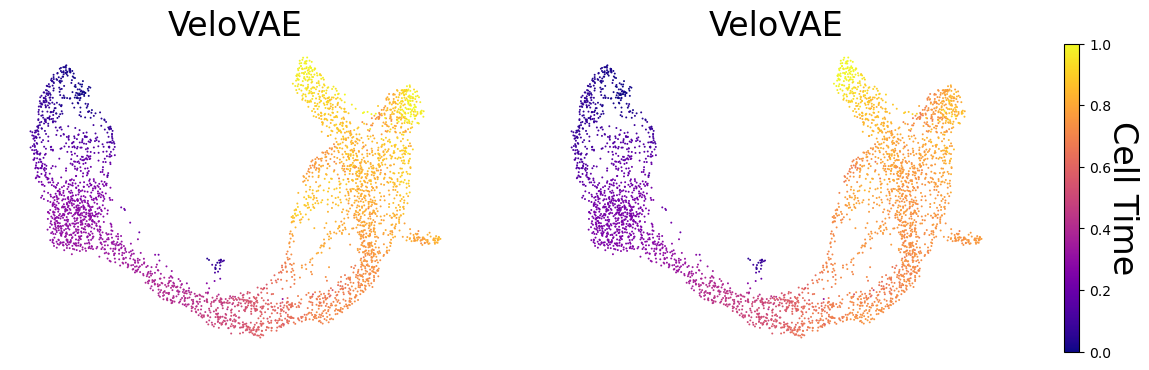

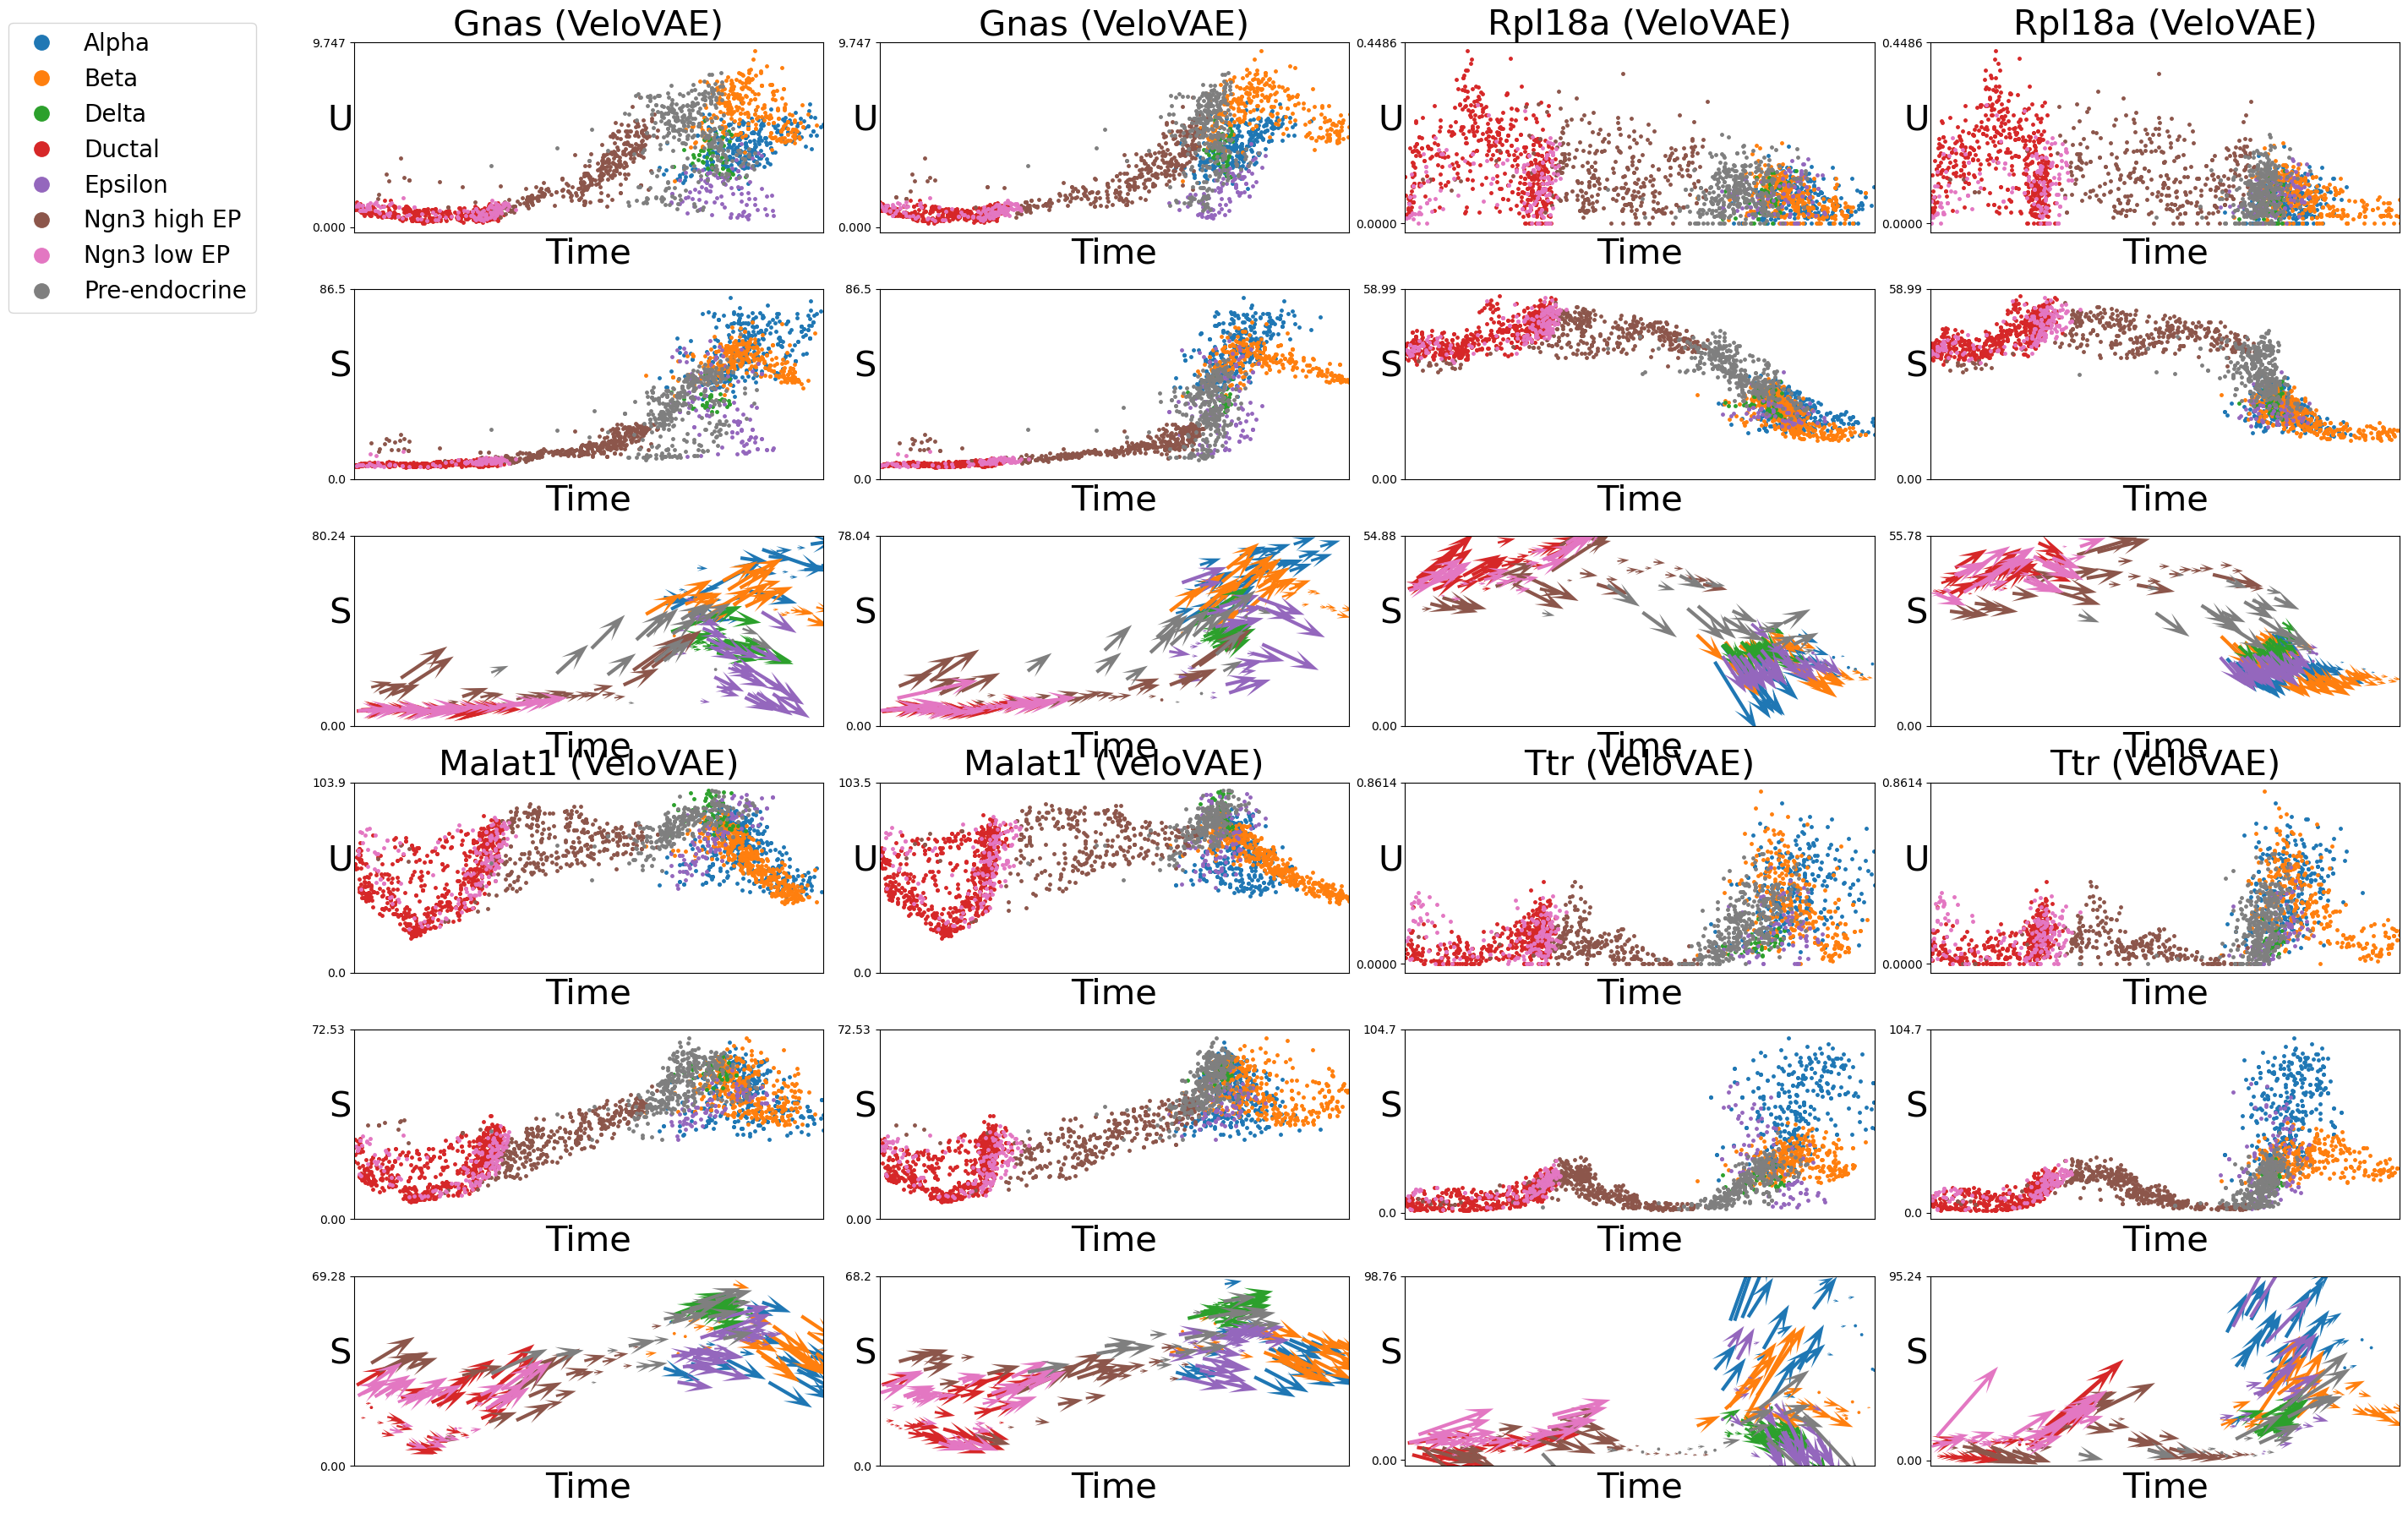

In [5]:
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2),
                                 figure_path=f'{root}/figures/{dataset}')

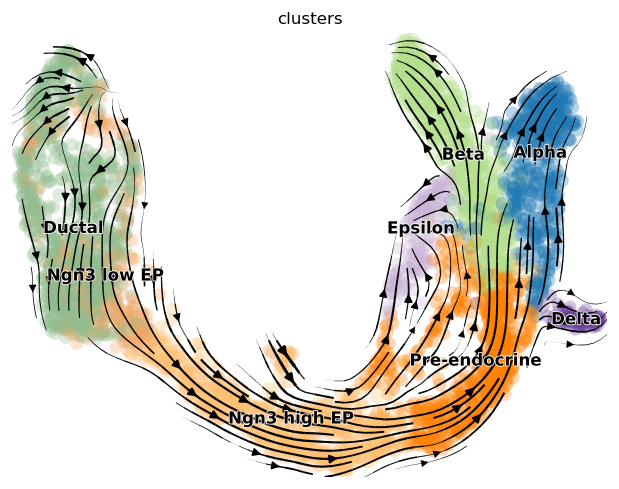

In [6]:
import scvelo as scv
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity',  dpi=120)